# Team 12 - Project One - Census Data

Our goal is to conduct predictive analysis and determine if the income of a random adult American citizen is based on given features, such as age, education, occupation, gender, race, work week, native region, family status, etc. We want to predict when a person will earn more than or less than 50,0000 dollars a year.

## Step 1:  Clean and transform the input dataset

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

# Read the dataset
replaced_df = pd.read_csv("replaced.csv", delimiter=',', skipinitialspace=True)
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours,United States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32525,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,18-22,40-45 hours,United States
32526,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,23-33,< 40 hours,United States
32527,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,34-40,40-45 hours,United States
32528,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,58-65,40-45 hours,United States


## Income
Income is the response variable, also called dependent variable 

In [2]:
# Overview of income
replaced_df["income"].value_counts()
under_50k = replaced_df[replaced_df["income"] == "<=50K"]
over_50k = replaced_df[replaced_df["income"] == ">50K"]

## Age

In [3]:
# Overview of age
replaced_df["age"].value_counts()

36    898
31    888
34    886
23    875
33    875
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

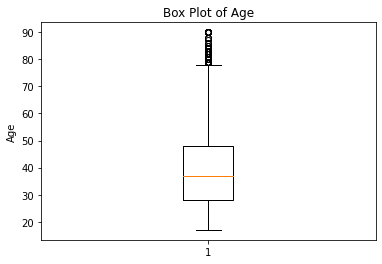

In [84]:
# Look at age data set and compute quantiles
age = replaced_df["age"]
age1 = under_50k["age"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.set_ylabel('Age')
ax1.boxplot(age)
plt.show()

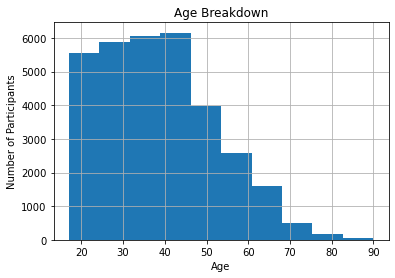

In [117]:
# Histogram of Age
replaced_df.hist(column="age")
plt.title("Age Breakdown")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.show()

In [95]:
# Get quartile calculations
quartiles = age.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of age is: {lowerq}")
print(f"The upper quartile of age is: {upperq}")
print(f"The interquartile range of age is: {iqr}")
print(f"The the median of age is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("Observation: From the histogram of “age”, we can see that the bulk of individuals in our sample are bewtween 20 and 50 years old.")

The lower quartile of age is: 28.0
The upper quartile of age is: 48.0
The interquartile range of age is: 20.0
The the median of age is: 37.0 
Values below -2.0 could be outliers.
Values above 78.0 could be outliers.
Observation: From the histogram of “age”, we can see that the bulk of individuals in our sample are bewtween 20 and 50 years old.


In [90]:
gen_mean = round(replaced_df["age"].mean(), 2)
under_mean = round(under_50k["age"].mean(), 2)
over_mean = round(over_50k["age"].mean(), 2)
mean_summary = pd.DataFrame({"General Mean": [gen_mean],
                                "Mean Age Making =<50k": [under_mean],
                                "Mean Age Making >50k": [over_mean]})
mean_summary

,General Mean,Mean Age Making =<50k,Mean Age Making >50k
0,38.59,36.79,44.25


In [87]:
gen_med = replaced_df["age"].median()
under_med = under_50k["age"].median()
over_med = over_50k["age"].median()
median_summary = pd.DataFrame({"General Median": [gen_med],
                                "Median Age Making =<50k": [under_med],
                                "Median Age Making >50k": [over_med]})
median_summary

,General Median,Median Age Making =<50k,Median Age Making >50k
0,37.0,34.0,44.0


In [85]:
gen_min = replaced_df["age"].min()
under_min = under_50k["age"].min()
over_min = over_50k["age"].min()
minimum_summary = pd.DataFrame({"General Minimum": [gen_min],
                                "Minimum Age Making =<50k": [under_min],
                                "Minimum Age Making >50k": [over_min]})
minimum_summary

,General Minimum,Minimum Age Making =<50k,Minimum Age Making >50k
0,17,17,19


In [82]:
gen_max = replaced_df["age"].max()
under_max = under_50k["age"].max()
over_max = over_50k["age"].max()
maximum_summary = pd.DataFrame({"General Maximum": [gen_max],
                                "Maximum Age Making =<50k": [under_max],
                                "Maximum Age Making >50k": [over_max]})
maximum_summary

,General Maximum,Maximum Age Making =<50k,Maximum Age Making >50k
0,90,90,90


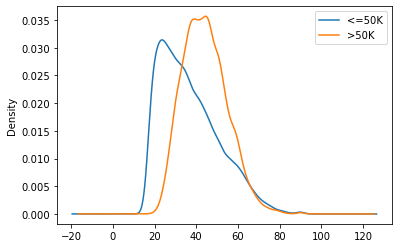

In [119]:
# Density of age grouped by income
replaced_df.groupby("income").age.plot(kind='kde')
plt.legend();
plt.show()

In [9]:
# Create the bins in which age will be held
# Bins are 0, 17, 22, 33, 40, 57, 65, 78, 99   
bins = [0, 17, 22, 33, 40, 57, 65, 78, 99]

# Create the names for the age bins
group_labels = ["< 18", "18-22", "23-33", "34-40", "41-57", "58-65", "66-78", "> 78"]

In [97]:
# Place the data series into a new column inside of the DataFrame
replaced_df["Age Category"] = pd.cut(replaced_df["age"], bins, labels=group_labels)
replaced_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Category,Hours Per Week,Native Region
0,90,Not-Available,77053,HS-grad,9,Widowed,Not-Available,Not-in-family,White,Female,0,4356,40,United-States,<=50K,> 78,40-45 hours,United States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,> 78,< 40 hours,United States
2,66,Not-Available,186061,Some-college,10,Widowed,Not-Available,Unmarried,Black,Female,0,4356,40,United-States,<=50K,66-78,40-45 hours,United States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-57,40-45 hours,United States


In [227]:
# Creating a group based off of the Age Category
age_income = replaced_df[["Age Category", "income"]]
age_income_count = age_income.groupby(["Age Category", "income"]).agg(total = ("Age Category", "count"))
age_count = age_income.groupby(["Age Category"]).agg(total = ("Age Category", "count"))
age_income_count["Percentage"] = round(age_income_count.div(age_count) * 100, 2)
age_income_count.reset_index(inplace=True)
age_income_count



,Age Category,income,total,Percentage
0,< 18,<=50K,394,100.00
1,< 18,>50K,0,0.00
2,18-22,<=50K,3471,99.48
3,18-22,>50K,18,0.52
4,23-33,<=50K,8032,86.75
5,23-33,>50K,1227,13.25
6,34-40,<=50K,4110,69.05
7,34-40,>50K,1842,30.95
8,41-57,<=50K,6227,61.82
9,41-57,>50K,3845,38.18


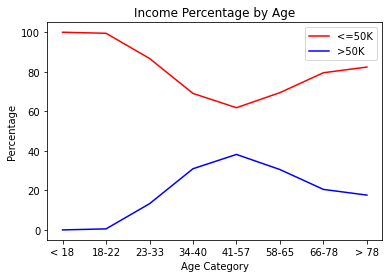

In [242]:
#Make a line graph with the percentages

under_age = age_income_count.loc[age_income_count["income"] == "<=50K"]
under_plot, = plt.plot(under_age["Age Category"], under_age["Percentage"], color="red", label="<=50K" )

over_age = age_income_count.loc[age_income_count["income"] == ">50K"]
over_plot, = plt.plot(over_age["Age Category"], over_age["Percentage"], color="blue", label=">50K" )

plt.title("Income Percentage by Age")
plt.xlabel("Age Category")
plt.ylabel("Percentage")
plt.legend(handles=[under_plot, over_plot], loc="best")
plt.show()



In [124]:
print("Observation: The age group that is most likely to make more than 50k/year is age 41-57.")
print("This is likely because people in this age group have a lot of professional experience and may have received promotions, but most haven't started thinking about retirement yet.")

Observation: The age group that is most likely to make more than 50k/year is age 41-57.
This is likely because people in this age group have a lot of professional experience and may have received promotions, but most haven't started thinking about retirement yet.


# Gender

In [104]:
#Find gender breakdown in our dataset 
gender_count = replaced_df["sex"].value_counts()
gender_count

Male      21770
Female    10760
Name: sex, dtype: int64

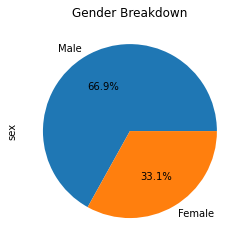

In [115]:
#Pie chart of gender breakdowm
gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Breakdown")
plt.show()

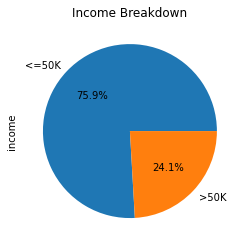

In [112]:
#Find income breakdown in general 
income_count = replaced_df["income"].value_counts()
income_count.plot(kind="pie", autopct="%1.1f%%")
plt.title("Income Breakdown")
plt.show()

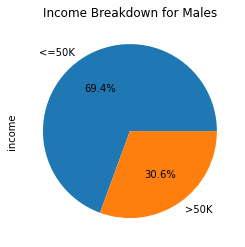

In [106]:
#Find the income breakdown for males
male_data = replaced_df[replaced_df["sex"] == "Male"]
male_income = male_data["income"].value_counts()
male_income.plot(kind="pie", autopct="%1.1f%%")
plt.title("Income Breakdown for Males")
plt.show()

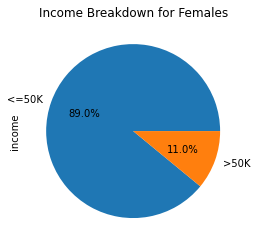

In [107]:
#Find the income breakdown for females
female_data = replaced_df[replaced_df["sex"] == "Female"]
female_income = female_data["income"].value_counts()
female_income.plot(kind="pie", autopct="%1.1f%%")
plt.title("Income Breakdown for Females")
plt.show()


In [114]:
print("Observation: In our general sample, about 24% of those surveyed made more than 50k per year.")
print("30.6% of males in our sample made more than 50k/year, but only 11% of females did.")

Observation: In our general sample, about 24% of those surveyed made more than 50k per year.
30.6% of males in our sample made more than 50k/year, but only 11% of females did.


## Step 3:  Test multiple hypotheses and provide observations and insights to the following:

#### AGE

1. The older an individual is, the bigger their chances of having a higher income. And can this be explained by the fact that the older one gets, the more experienced professionally they become and this usually means a higher salary? 

#### WORK WEEK

2.	Do people who earn more than 50K tend to work for hours than those that earn less than 50K? Do men work more hours per week than women at all ages? At what age does the working hours per week decrease and by how much?

#### WORK CLASS

3.	Most people are employed in the private sector. Do people in the private sector earn more than the other work classes?


In [ ]:
# #Observation
# Next we display the density of age grouped by income. From the plot we see that the majority of people earning more than 50K a year are between 33 and 55 years old, whereas the the greater number of people who earn less than 50K a year are between 18 and 45.
# The density plot clearly shows that age and income are correlated – people of greater age have higher income. This can be also seen from the histograms of age by income. SARAH - YOU WILL NEED TO BUILD THIS

## Step 4:  Deliver results